---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [4]:
def answer_one():
    #We read the data to dataframe
    df = pd.read_csv('fraud_data.csv')
    #To find the percentage, we simply divide the # of fraud transactions to the total number
    return len(df[df['Class']==1])/len(df)
answer_one()

0.016410823768035772

In [5]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [6]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score
    
    # Your code here
    
    #First, I train the dummy classifier
    dummy_classifier = DummyClassifier().fit(X_train, y_train)
    
    #Then, I get the score of the classifier
    accuracy_score = dummy_classifier.score(X_test, y_test)
    
    #I test the classifier on previously unseen data
    y_pred = dummy_classifier.predict(X_test)
    recall = recall_score(y_test, y_pred)
    return (accuracy_score, recall)
answer_two()

(0.96699852507374628, 0.025000000000000001)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [7]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC

    #First of all we train the classifier
    svm = SVC().fit(X_train, y_train)
    
    #Then I calculate the accuracy score
    accuracy_score = svm.score(X_test, y_test)
    
    #Predict on the test data
    y_pred = svm.predict(X_test)
    
    #Calculate the recall score
    recall = recall_score(y_test, y_pred)
    
    #Calculate the precision score
    precision = precision_score(y_test, y_pred)
    
    return (accuracy_score, recall, precision)
answer_three()

(0.99078171091445433, 0.375, 1.0)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [8]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC
    
    #Here I train the Support Vector Machine
    svm = SVC(C=1e9, gamma=1e-07).fit(X_train, y_train)
    #Here I filter by setting the threshold of -220
    y_pred = svm.decision_function(X_test) >-220
    #Here I construct the confusion matrix
    confusion_matrix = confusion_matrix(y_test, y_pred)
    return confusion_matrix
answer_four()

array([[5320,   24],
       [  14,   66]], dtype=int64)

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

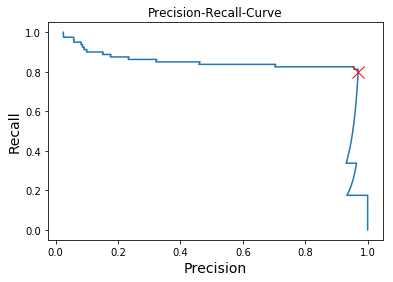

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve 
from sklearn.metrics import roc_auc_score, roc_curve

#We train the logistic regression model
y_logistic_regression = LogisticRegression().fit(X_train, y_train).decision_function(X_test)

#We return the precision, recall and thresholds from the function to the variables
precision, recall, thresholds = precision_recall_curve(y_test, y_logistic_regression)

#We compute the closest zeros for precision and recall
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

#Then, I plot the precision recall curve using the matplotlib
plt.figure()
plt.plot(precision, recall, label='Precision-Recall-Curve')
plt.title('Precision-Recall-Curve')
plt.plot(closest_zero_p, closest_zero_r, marker='x', markersize='12', c='r')
plt.xlabel('Precision', fontsize=14)
plt.ylabel('Recall', fontsize=14)
plt.show()

#Here is the value of recall where precision is 0.75
recall = recall[precision==0.75][0]

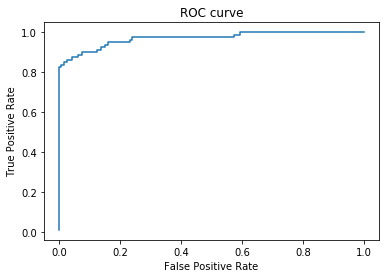

In [51]:
#Then I plot the ROC curve:
false_positive_rate, true_positive_rate, p= roc_curve(y_test, y_logistic_regression)
plt.figure()
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

#From looking to ROC I can see that when False Positive Rate is 0.16,
#True Positive rate is about 0.91


In [50]:
def answer_five():
    
    #The value of 0.91 I got by looking at the ROC plot
    return (recall, 0.91) 
answer_five()

(0.82499999999999996, 0.91)

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array.*

In [60]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression
    
    #I construct the classifier
    logistic_regression = LogisticRegression()
    
    #I set the parameters of the gridsearch
    grid_search = GridSearchCV(logistic_regression, 
                                    param_grid={'penalty': ['l1', 'l2'], 'C':[0.01, 0.1, 1, 10, 100]},
                                    scoring='recall')
    #I train the classifier
    grid_search.fit(X_train, y_train)
    
    #Finally, I get the mean test score from cv results and convert it to a 5x2 numpy array
    return grid_search.cv_results_['mean_test_score'].reshape((5,2))
answer_six()

array([[ 0.66666667,  0.76086957],
       [ 0.80072464,  0.80434783],
       [ 0.8115942 ,  0.8115942 ],
       [ 0.80797101,  0.8115942 ],
       [ 0.80797101,  0.8115942 ]])

<IPython.core.display.Javascript object>


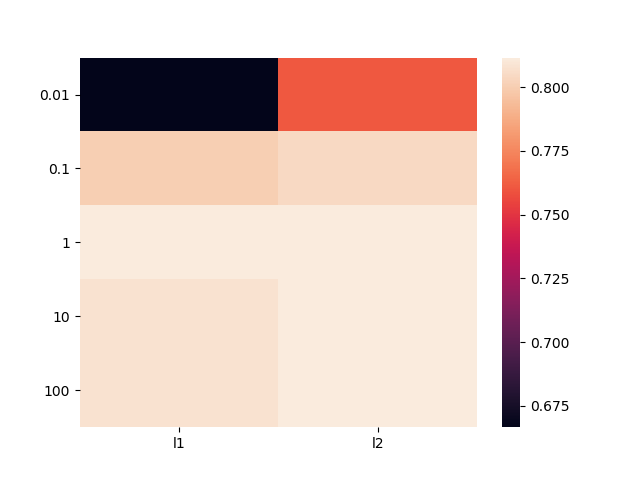

In [61]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

GridSearch_Heatmap(answer_six())